In [434]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

## Importing dataset

In [435]:
# Reading data From file
data=pd.read_csv('final_file.csv')

In [436]:
# Checking data types
data.dtypes

city                     object
customer_age              int64
customer_name            object
customer_segment         object
discount                float64
order_date               object
order_id                 object
order_priority           object
order_quantity            int64
product_base_margin     float64
product_category         object
product_container        object
product_name             object
product_sub_category     object
profit                  float64
region                   object
sales                   float64
ship_date                object
ship_mode                object
shipping_cost           float64
state                    object
unit_price              float64
zip_code                float64
dtype: object

In [437]:
# Data is DataFrame and the date columns are 'order_date' and 'ship_date'

# We want to convert it into datetime format for time series forcasting
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True)
data['ship_date'] = pd.to_datetime(data['ship_date'], dayfirst=True)

# Print Datatype for cross checking
print(data[['order_date', 'ship_date']].dtypes)

C:\Users\kthor\AppData\Local\Temp\ipykernel_17640\688166010.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True)


order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object


In [438]:
# checking first 5 element
data.head()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
0,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,a42c8cff-5757-4e94-80b0-807538fefd25,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,21.84,2020-03-02,Delivery Truck,3.772509,Wisconsin,3.29,54481.0
1,Stevens Point,60,Dennis Bolton,Corporate,0.17,2020-02-29,1c37f301-564f-40ff-bd7d-73a6c06ede1a,Not Specified,7,0.55,...,Chairs & Chairmats,19559.92268,Central,1811.67,2020-03-07,Delivery Truck,816.340893,Wisconsin,258.98,54481.0
2,Grapevine,49,Anthony Garverick,Small Business,0.05,2021-11-11,ec649eae-535d-4154-b3ef-c4405bd59da9,Medium,42,0.69,...,Tables,7535.93880,Central,6129.06,2021-11-15,Delivery Truck,4530.505983,Texas,145.98,76051.0
3,Tempe,30,Anne McFarland,Consumer,0.05,2020-08-02,efdcbace-5320-4005-95e2-4c94a896dc8c,Not Specified,30,0.37,...,Paper,18860.92419,West,198.90,2020-08-08,Regular Air,128.731505,Arizona,6.68,85281.0
4,Upper Arlington,84,Sara Luxemburg,Corporate,0.25,2020-09-26,6b88eca0-426a-4fd4-83c6-1657c43f94a0,High,31,0.77,...,Computer Peripherals,20175.51620,East,243.97,2020-09-30,Express Air,17.811073,Ohio,8.12,43221.0


In [439]:
# checking last 5 element
data.tail()

,city,customer_age,customer_name,customer_segment,discount,order_date,order_id,order_priority,order_quantity,product_base_margin,...,product_sub_category,profit,region,sales,ship_date,ship_mode,shipping_cost,state,unit_price,zip_code
1009313,Tiverton,55,Roland Murray,Corporate,0.15,2019-07-13,53d46dc3-d6cb-4a55-8626-1614aa9f3d77,Medium,50,0.58,...,Storage & Organization,15732.04569,East,1406.50,2019-07-21,Express Air,1092.369372,Rhode Island,28.28,2878.0
1009314,Vestavia Hills,63,Ed Jacobs,Corporate,0.18,2020-04-23,243e3616-443d-4f35-8534-8a680f364188,Low,31,0.59,...,Storage & Organization,20701.07035,South,241.80,2020-04-28,Express Air,44.258342,Alabama,7.98,35216.0
1009315,Fort Worth,79,Eugene Moren,Small Business,0.25,2020-06-18,c2cff208-474b-47d8-a956-c0703d5a11ba,Medium,2,0.37,...,Binders and Binder Accessories,-2951.55084,Central,3.82,2020-06-27,Express Air,0.106669,Texas,2.16,76106.0
1009316,Huntington Beach,62,Randy Ferguson,Small Business,0.09,2020-06-07,3b3e237d-bf45-4b07-aecd-8e4e47ca47ec,Critical,24,0.81,...,Storage & Organization,22180.49814,West,1941.36,2020-06-17,Express Air,324.770871,California,80.98,92646.0
1009317,Saratoga,62,Liz Willingham,Small Business,0.05,2020-12-01,b317e74c-9891-4c0d-9977-aaf767b2721e,Critical,11,0.82,...,Storage & Organization,9140.72233,West,1114.96,2020-12-09,Regular Air,125.152699,California,101.41,95070.0


In [440]:
# We want to perform Time series forcast so we remove other column
data.columns

Index(['city', 'customer_age', 'customer_name', 'customer_segment', 'discount',
       'order_date', 'order_id', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container',
       'product_name', 'product_sub_category', 'profit', 'region', 'sales',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code'],
      dtype='object')

In [441]:
data1=data.drop(['city', 'customer_age', 'customer_name', 'customer_segment', 'order_id', 'discount', 'order_priority', 'order_quantity',
       'product_base_margin', 'product_category', 'product_container','product_name', 'product_sub_category', 'profit', 'region',
       'ship_date', 'ship_mode', 'shipping_cost', 'state', 'unit_price',
       'zip_code'],axis=1)

In [442]:
# Check columns
data1.columns

Index(['order_date', 'sales'], dtype='object')

In [443]:
#Check the data types
data1.dtypes

order_date    datetime64[ns]
sales                float64
dtype: object

## Outlier Handling

In [444]:
# Checking outlier

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data1['sales'].quantile(0.25)
Q3 = data1['sales'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outliers based on 1.5*IQR(Inter Quartile Range)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_outlier = data1['sales'].apply(lambda x: (x if x < lower_bound else None ) or (x if x > upper_bound else None))
print("Outlier count is",df_outlier.count())

Outlier count is 124888


In [445]:
# Handling outlier

# Replace outliers with upper_bound and lower_bound
data1['sales'] = data1['sales'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# DataFrame after replacing outliers
print(data1)

        order_date    sales
0       2020-02-29    21.84
1       2020-02-29  1811.67
2       2021-11-11  4408.89
3       2020-08-02   198.90
4       2020-09-26   243.97
...            ...      ...
1009313 2019-07-13  1406.50
1009314 2020-04-23   241.80
1009315 2020-06-18     3.82
1009316 2020-06-07  1941.36
1009317 2020-12-01  1114.96

[1009318 rows x 2 columns]


In [446]:
# Checking Shape 
data1.shape

(1009318, 2)

### Sample set for trial

In [447]:
# Take sample size of 50,000 random
sample = data1.sample(n=50000, random_state=42)

In [448]:
# Checking Shape
sample.shape

(50000, 2)

In [449]:
# checking first 5 element
sample.head()

,order_date,sales
942079,2019-05-18,4408.89
796879,2021-07-09,381.84
261258,2019-03-28,4408.89
132841,2020-12-04,57.70
70714,2019-09-30,2519.25


In [450]:
# checking last 5 element
sample.tail()

,order_date,sales
395483,2019-04-12,4408.89
970586,2021-11-13,154.56
56425,2020-03-12,6.93
18829,2022-11-23,1151.36
6998,2021-07-20,3926.16


In [451]:
# Want to calculate sales by month so firstly we have to calculate day wise sales & then we can aggregate it monthwise
# Aggregate sales by date to remove duplicates
df = sample.groupby('order_date').agg({'sales': 'sum'})

In [452]:
# Checking Shape
df.shape

(1461, 1)

In [453]:
# checking first 5 element
df.head()

,sales
order_date,
2019-01-01,37659.47
2019-01-02,60052.86
2019-01-03,44292.47
2019-01-04,38410.81
2019-01-05,49022.58


In [454]:
# checking last 5 element
df.tail()

,sales
order_date,
2022-12-27,47285.99
2022-12-28,51830.10
2022-12-29,34267.36
2022-12-30,30130.00
2022-12-31,26365.62


In [455]:
# Resample the data by month and calculate the sum of sales monthly
df_monthly = df.resample('M').agg({'sales': 'sum'})

# add the monthly sum
df['monthly_sales'] = df['sales'].resample('M').transform('sum')

# Reset the index
df.reset_index(inplace=True)

In [456]:
# checking first 5 element
df.head()

,order_date,sales,monthly_sales
0,2019-01-01,37659.47,1343560.4
1,2019-01-02,60052.86,1343560.4
2,2019-01-03,44292.47,1343560.4
3,2019-01-04,38410.81,1343560.4
4,2019-01-05,49022.58,1343560.4


In [457]:
# Converting daywise period to monthly period
df['month'] = df['order_date'].dt.to_period('M')

In [458]:
# Checking Shape
df.shape

(1461, 4)

In [459]:
# Set index as month
df.set_index('month',inplace=True)

In [460]:
#Check columns
df.columns

Index(['order_date', 'sales', 'monthly_sales'], dtype='object')

In [461]:
# checking first 5 element
df.head()

,order_date,sales,monthly_sales
month,,,
2019-01,2019-01-01,37659.47,1343560.4
2019-01,2019-01-02,60052.86,1343560.4
2019-01,2019-01-03,44292.47,1343560.4
2019-01,2019-01-04,38410.81,1343560.4
2019-01,2019-01-05,49022.58,1343560.4


In [462]:
# we have to remove duplicates dates from and index
df1 = df[~df.index.duplicated(keep='first')]

In [463]:
# checking first 5 element
df1.head()

,order_date,sales,monthly_sales
month,,,
2019-01,2019-01-01,37659.47,1343560.40
2019-02,2019-02-01,44232.85,1191165.38
2019-03,2019-03-01,35588.72,1270771.45
2019-04,2019-04-01,51448.92,1196374.88
2019-05,2019-05-01,42347.13,1320339.45


In [464]:
# We want only monthly sales and date column so we have to remove other columns
df1.columns

Index(['order_date', 'sales', 'monthly_sales'], dtype='object')

In [465]:
# Drop column order_date and sales 
df2=df1.drop(['order_date','sales'],axis=1)

<Axes: xlabel='month'>

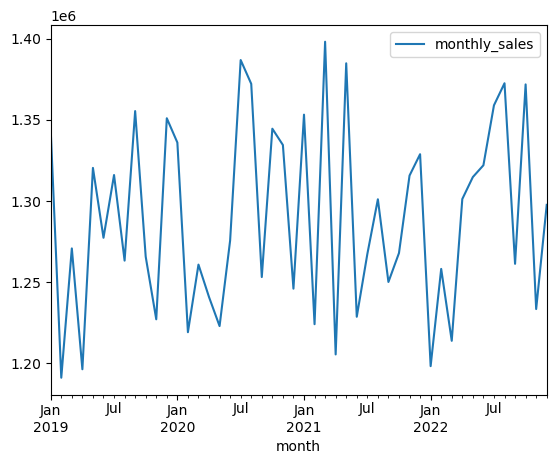

In [466]:
# Plot graph for monthly sales
df2.plot()

## Testing For Stationarity
#### Augmented Dickey–Fuller test
#Ho: It is non stationary
#H1: It is stationary

In [467]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df2['monthly_sales'])

In [468]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(monthly_sales):
    result=adfuller(monthly_sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [469]:
adfuller_test(df2['monthly_sales'])

ADF Test Statistic : -8.575910638626167
p-value : 7.964492107932309e-14
#Lags Used : 0
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [470]:
# from test we can see p value is very near to 0 so we can say that time series is stationary
# data is stationery so we can directly perform Autoregressive model

## Autoregressive model

In [471]:
# import libraries for autocorrelation
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

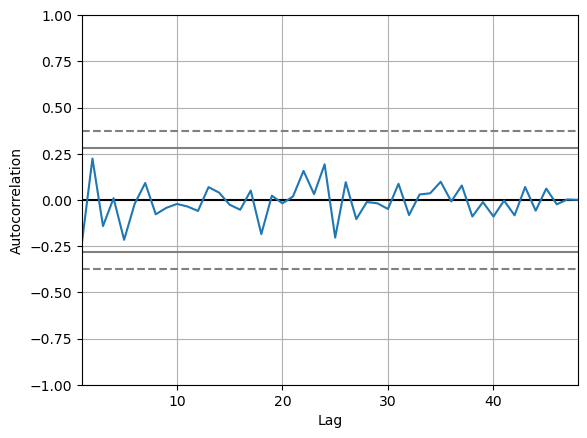

In [472]:
# Plot graph for autocorrelation 
autocorrelation_plot(df2['monthly_sales'])
plt.show()

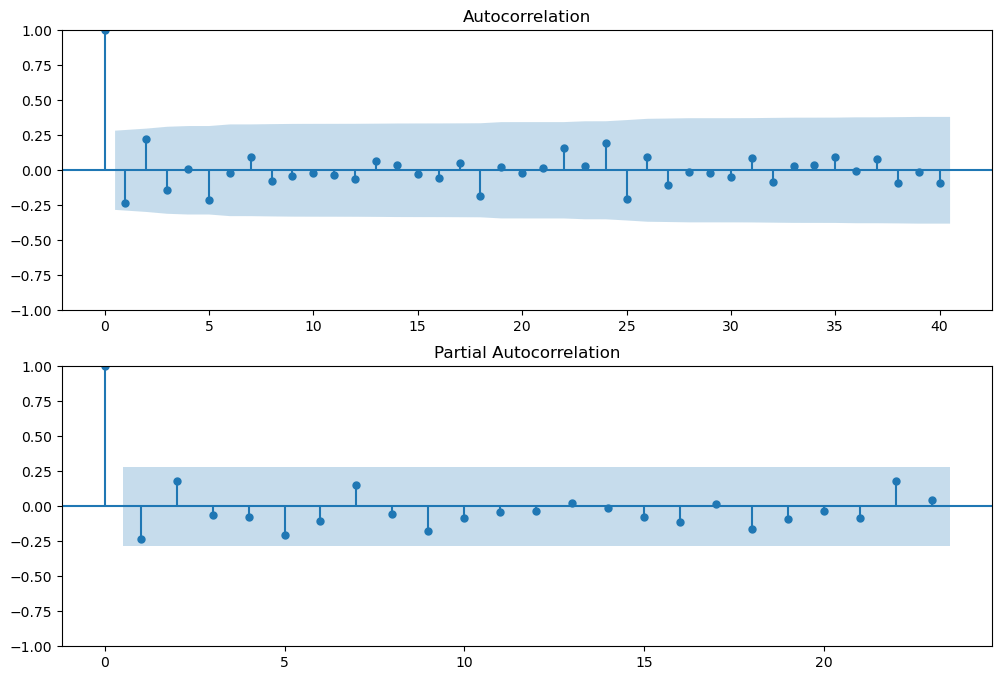

In [473]:
# acf,pacf graphs
# Autocorrelation and Partial Autocorrelation

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['monthly_sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['monthly_sales'].iloc[0:],lags=23,ax=ax2)

In [474]:
# checking first 5 element
df2.head()

,monthly_sales
month,
2019-01,1343560.40
2019-02,1191165.38
2019-03,1270771.45
2019-04,1196374.88
2019-05,1320339.45


## Arima model for sample data

In [475]:
# Importing libraries for ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [476]:
# Fit ARIMA model order (1, 1, 1)
model=ARIMA(df2['monthly_sales'],order=(1,1,1))
model_fit=model.fit()

<Axes: xlabel='month'>

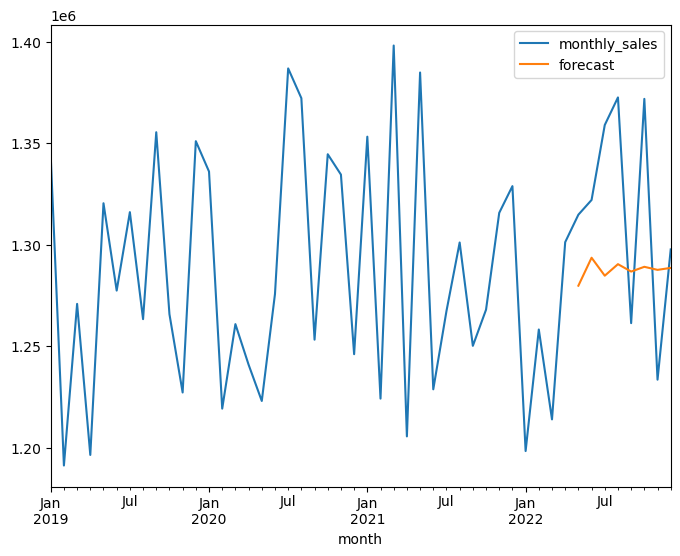

In [477]:
# Forecast
df2['forecast'] = model_fit.predict(start=40, end=48, dynamic=True)

# Plot
df2[['monthly_sales', 'forecast']].plot(figsize=(8, 6))
#plt.show()

### Splitting Data & Forcasting on Test data for ARIMA Model
#Train 90% & Test 10%

In [478]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#  df2 is DataFrame with a 'monthly_sales' column
# Splitting the data into training and testing sets
train_size = int(len(df2) * 0.9)  # 90% training, 10% testing
train, test = df2['monthly_sales'][:train_size], df2['monthly_sales'][train_size:]

In [479]:
start = len(train)
end = len(train) + len(test) - 1
forecast = model_fit.predict(start=start, end=end, dynamic=False)

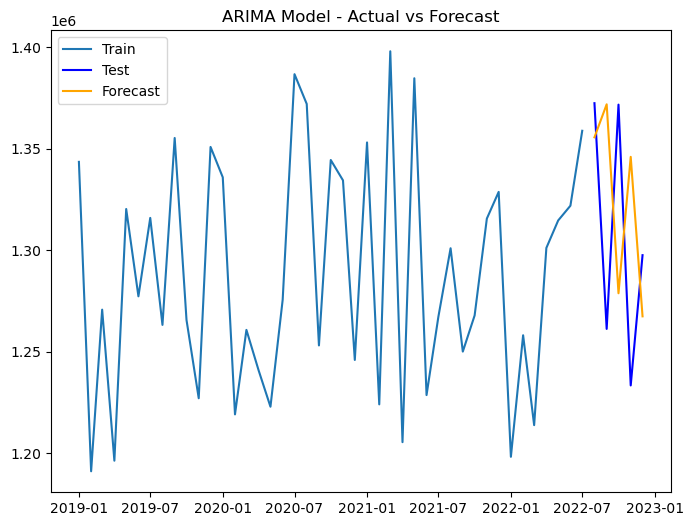

In [480]:
# Train, test, and forecast are data series

# Convert PeriodIndex to DatetimeIndex
if isinstance(train.index, pd.PeriodIndex):
    train.index = train.index.to_timestamp()

if isinstance(test.index, pd.PeriodIndex):
    test.index = test.index.to_timestamp()

if isinstance(forecast.index, pd.PeriodIndex):
    forecast.index = forecast.index.to_timestamp()

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('ARIMA Model - Actual vs Forecast')
plt.legend(loc='best')
plt.show()

In [481]:
# Model evaluation parameter 
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 72609.26479651142
Mean Squared Error (MSE): 6946816905.203486
Root Mean Squared Error (RMSE): 83347.56688232408


## SARIMA model for sample data

In [482]:
# Apply sarima
model=sm.tsa.statespace.SARIMAX(df2['monthly_sales'],order=(24, 0, 22))
results=model.fit()

C:\Users\kthor\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kthor\anaconda3\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='month'>

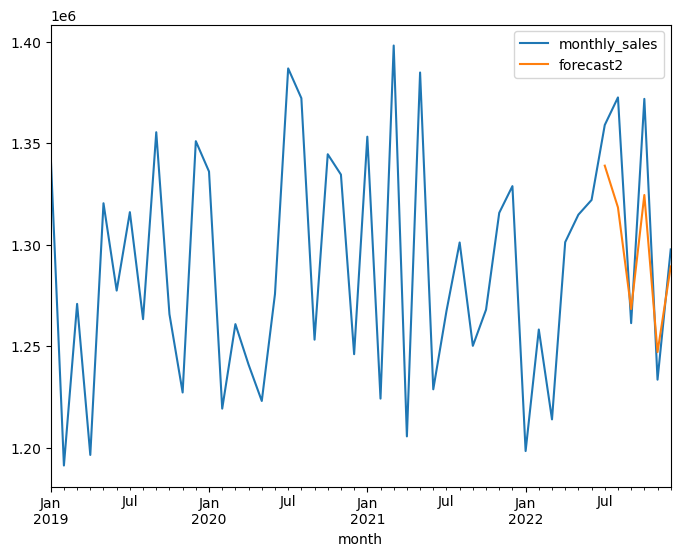

In [483]:
df2['forecast2']=results.predict(start=42,end=48,dynamic=True)
df2[['monthly_sales','forecast2']].plot(figsize=(8,6))

### Splitting Data & Forcasting on Test data
#Train 90% & Test 10%

In [484]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Splitting the data into training and testing sets
train_size = int(len(df2) * 0.9)  # 90% training, 10% testing
train, test = df2['monthly_sales'][:train_size], df2['monthly_sales'][train_size:]

In [485]:
start = len(train)
end = len(train) + len(test) - 1
forecast = model_fit.predict(start=start, end=end, dynamic=False)

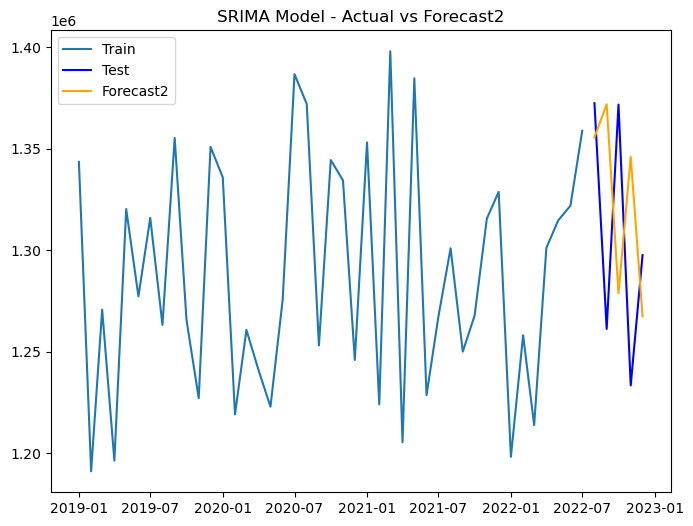

In [486]:
# train, test, and forecast are data series

# Convert PeriodIndex to DatetimeIndex if necessary
if isinstance(train.index, pd.PeriodIndex):
    train.index = train.index.to_timestamp()

if isinstance(test.index, pd.PeriodIndex):
    test.index = test.index.to_timestamp()

if isinstance(forecast.index, pd.PeriodIndex):
    forecast.index = forecast.index.to_timestamp()

# Plotting the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast2', color='orange')
plt.title('SRIMA Model - Actual vs Forecast2')
plt.legend(loc='best')
plt.show()

In [487]:
# Evaluation parameter
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 72609.26479651142
Mean Squared Error (MSE): 6946816905.203486
Root Mean Squared Error (RMSE): 83347.56688232408


## For Entire Dataset

In [488]:
# checking shape
data1.shape

(1009318, 2)

In [489]:
# Want to calculate sales by month so firstly we have to calculate day wise sales & then we can aggregate it monthwise
# Aggregate sales by date to remove duplicates
df3 = data1.groupby('order_date').agg({'sales': 'sum'})

In [490]:
#checking shape
df3.shape

(1461, 1)

In [491]:
# Resample the data by month and calculate the sum of sales monthly
df_month = df3.resample('M').agg({'sales': 'sum'})

# Monthly sum
df3['month_sales'] = df3['sales'].resample('M').transform('sum')

# Reset the index
df3.reset_index(inplace=True)

In [492]:
# checking first 5 element
df3.head()

,order_date,sales,month_sales
0,2019-01-01,793877.16,26462081.13
1,2019-01-02,909337.74,26462081.13
2,2019-01-03,878111.88,26462081.13
3,2019-01-04,796853.02,26462081.13
4,2019-01-05,937855.53,26462081.13


In [493]:
# Converting daywise date into month
df3['month'] = df3['order_date'].dt.to_period('M')

In [494]:
# checking first 5 element
df3.head()

,order_date,sales,month_sales,month
0,2019-01-01,793877.16,26462081.13,2019-01
1,2019-01-02,909337.74,26462081.13,2019-01
2,2019-01-03,878111.88,26462081.13,2019-01
3,2019-01-04,796853.02,26462081.13,2019-01
4,2019-01-05,937855.53,26462081.13,2019-01


In [495]:
# Set index to month as we want to forecast sales by month
df3.set_index('month',inplace=True)

In [496]:
# we have to remove duplicates dates from and index
df4 = df3[~df3.index.duplicated(keep='first')]

In [497]:
# Checking columns
df4.columns

Index(['order_date', 'sales', 'month_sales'], dtype='object')

In [533]:
# Drop column order date and sales
df5=df4.drop(['order_date', 'sales'],axis=1)

In [534]:
# Making copy of dataframe
df6=df5.copy()

In [535]:
# checking first 5 element
df5.head()

,month_sales
month,
2019-01,26462081.13
2019-02,23262900.25
2019-03,26488513.31
2019-04,25966238.65
2019-05,26675574.93


In [536]:
# Printing first five element 
df6.head()

,month_sales
month,
2019-01,26462081.13
2019-02,23262900.25
2019-03,26488513.31
2019-04,25966238.65
2019-05,26675574.93


In [537]:
df5.month_sales.sum()
# sum of is 1.24 billion=1246.53 millions

1246533554.47

<Axes: xlabel='month'>

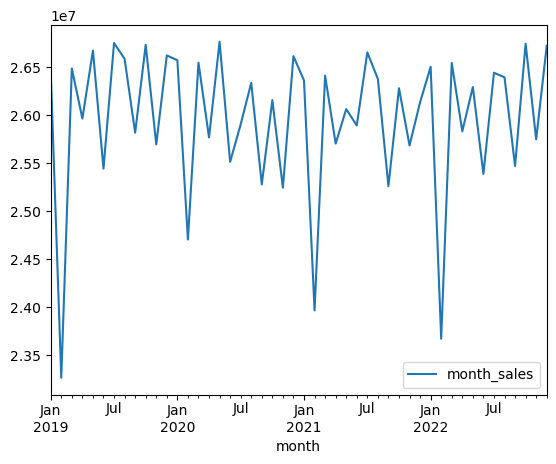

In [538]:
# Monthly sales for entire dataset
df5.plot()

### Cheack Stationarity

In [539]:
test_result=adfuller(df5['month_sales'])

In [540]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(month_sales):
    result=adfuller(month_sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho) #Alternate hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [541]:
adfuller_test(df5['month_sales'])

ADF Test Statistic : -3.6288582470215127
p-value : 0.0052326913120997656
#Lags Used : 10
Number of Observations Used : 37
strong evidence against the null hypothesis(Ho) #Alternate hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [542]:
# from test we can see p value is very near to 0 so we can say that time series is stationary
# data is stationery so we can directly perform Autoregressive model

## Autoregressive model

In [543]:
# import libraries for autocorrelation
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

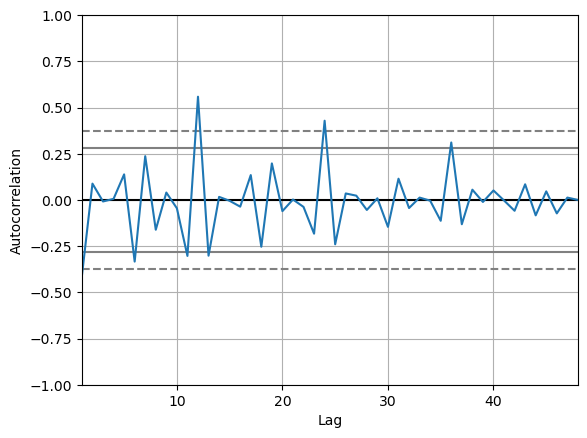

In [544]:
autocorrelation_plot(df5['month_sales'])
plt.show()

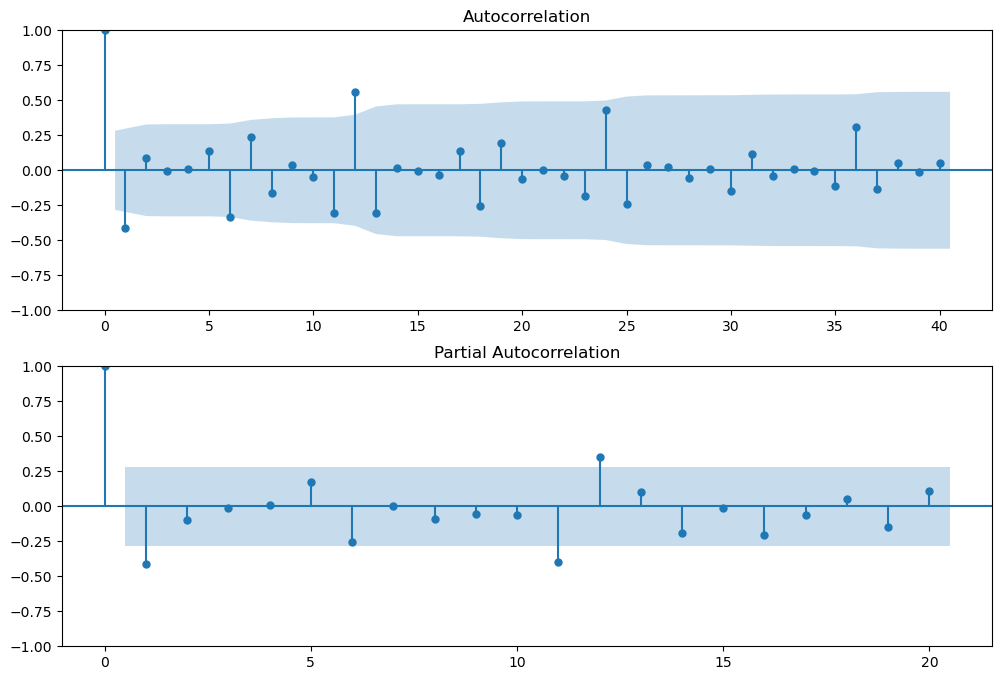

In [545]:
# acf,pacf graphs
# Autocorrelation and Partial Autocorrelation

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df5['month_sales'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df5['month_sales'].iloc[0:],lags=20,ax=ax2)

## ARIMA model for Entire Dataset

In [546]:
# importing necessary libraries
from statsmodels.tsa.arima.model import ARIMA

In [547]:
# checking first 5 element
df5.head()

,month_sales
month,
2019-01,26462081.13
2019-02,23262900.25
2019-03,26488513.31
2019-04,25966238.65
2019-05,26675574.93


In [548]:
# Fitting ARIMA model
model2=ARIMA(df5['month_sales'],order=(1,1,1))
model_fit=model2.fit()

<Axes: xlabel='month'>

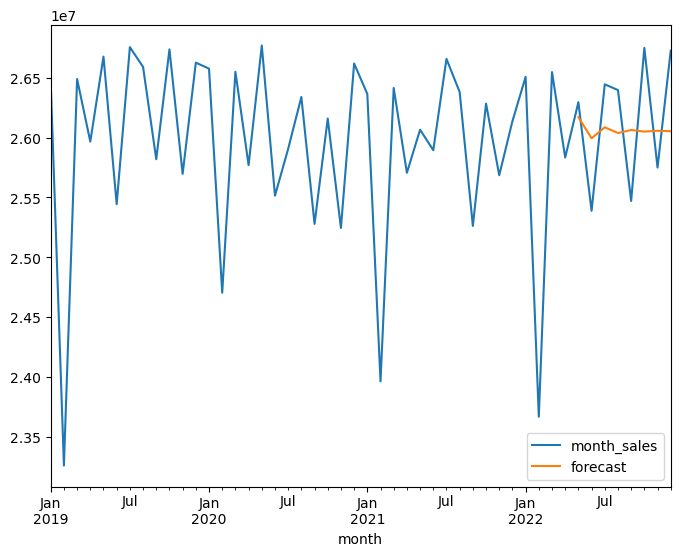

In [549]:
# Forecast
df5['forecast'] = model_fit.predict(start=40, end=48, dynamic=True)

# Plot
df5[['month_sales', 'forecast']].plot(figsize=(8, 6))
#plt.show()

### Splitting Data & Forcasting on Test data 
#Train 90% & Test 10%

In [550]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Splitting the data into training and testing sets
train_size = int(len(df5) * 0.9)  # 90% training, 10% testing
train, test = df5['month_sales'][:train_size], df5['month_sales'][train_size:]

start = len(train)
end = len(train) + len(test) - 1
forecast = model_fit.predict(start=start, end=end, dynamic=False)

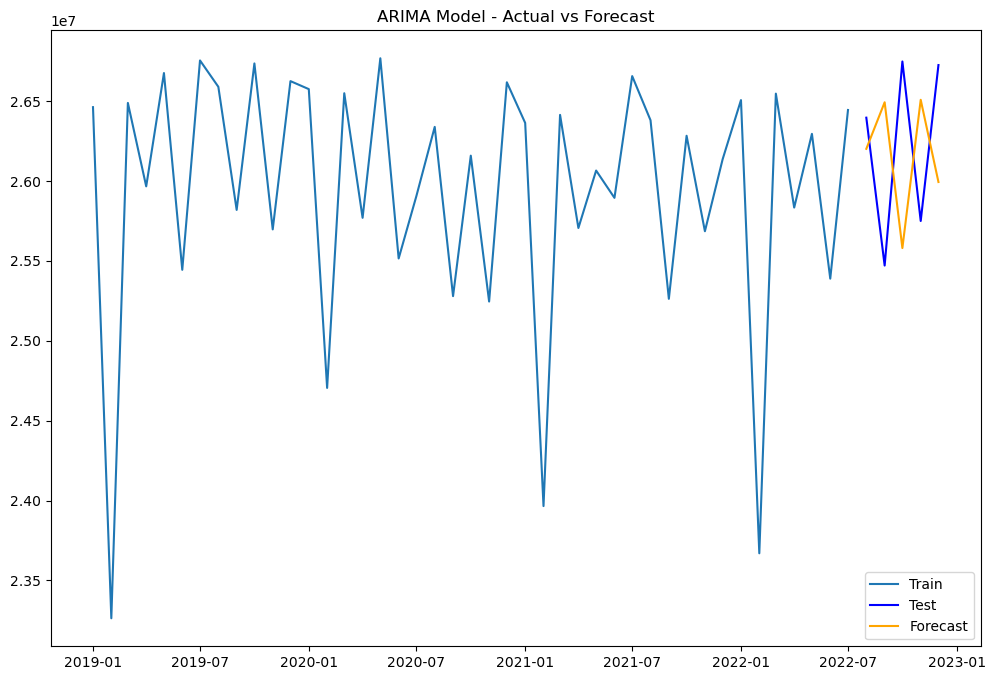

In [551]:
# Convert PeriodIndex to DatetimeIndex
train.index = train.index.to_timestamp()
test.index = test.index.to_timestamp()
forecast.index = forecast.index.to_timestamp()
# Plotting the actual vs predicted values
plt.figure(figsize=(12, 8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('ARIMA Model - Actual vs Forecast')
plt.legend(loc='best')
plt.show()

In [552]:
# Evaluation parameter
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 775034.0583259345
Mean Squared Error (MSE): 711441833733.1819
Root Mean Squared Error (RMSE): 843470.1143094413


## SARIMA for Entire Dataset

In [553]:
# checking first 5 element
df6.head()

,month_sales
month,
2019-01,26462081.13
2019-02,23262900.25
2019-03,26488513.31
2019-04,25966238.65
2019-05,26675574.93


C:\Users\kthor\anaconda3\New folder\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\kthor\anaconda3\New folder\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='month'>

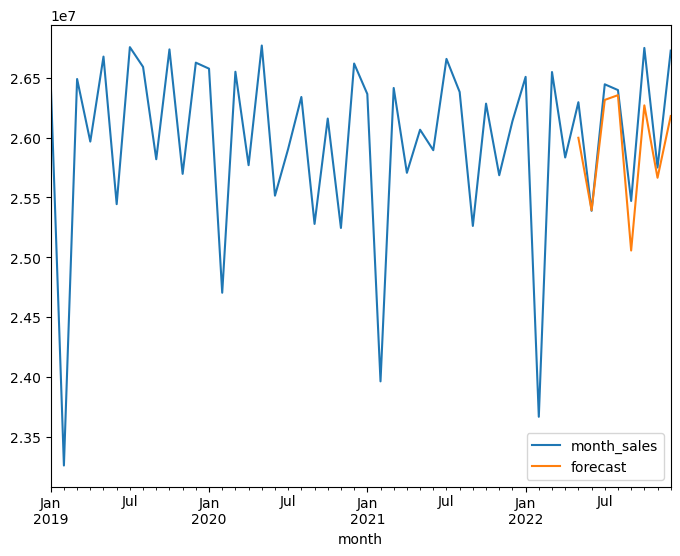

In [558]:
# Fit SARIMA model
model = sm.tsa.statespace.SARIMAX(df6['month_sales'], order=(13, 0, 17))
model_fit = model.fit()

# Forecast
df6['forecast'] = model_fit.predict(start=40, end=48, dynamic=True)

# Plot
df6[['month_sales', 'forecast']].plot(figsize=(8, 6))
#plt.show()

In [559]:
df6.head()

,month_sales,forecast
month,,
2019-01,26462081.13,NaN
2019-02,23262900.25,NaN
2019-03,26488513.31,NaN
2019-04,25966238.65,NaN
2019-05,26675574.93,NaN


### Splitting Data & Forcasting on Test data 
#Train 90% & Test 10%

In [560]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Splitting the data into training and testing sets
train_size2 = int(len(df6) * 0.9)  # 90% training, 10% testing
train2, test2 = df6['month_sales'][:train_size2], df6['month_sales'][train_size:]

In [561]:
start2 = len(train)
end2 = len(train) + len(test) - 1
forecast = model_fit.predict(start=start2, end=end2, dynamic=False)

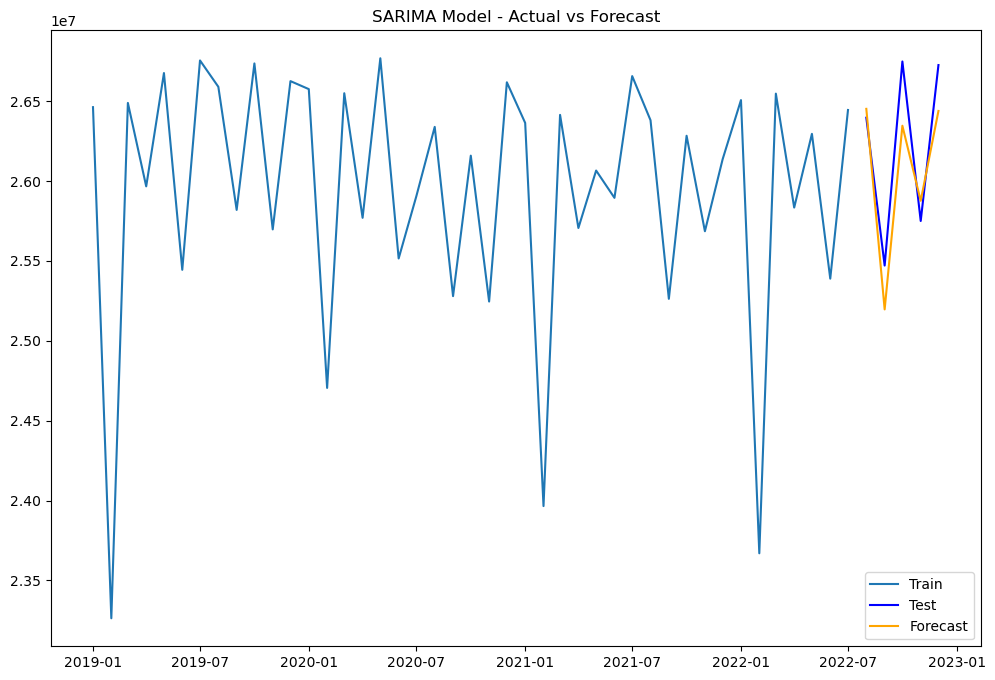

In [562]:
# Convert PeriodIndex to DatetimeIndex
#train.index = train.index.to_timestamp()
#test.index = test.index.to_timestamp()
#forecast.index = forecast.index.to_timestamp()

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 8))
plt.plot(train.index, train2, label='Train')
plt.plot(test.index, test2, label='Test', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('SARIMA Model - Actual vs Forecast')
plt.legend(loc='best')
plt.show()

In [563]:
# Evaluation parameter
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 229112.96548815147
Mean Squared Error (MSE): 67732947448.00641
Root Mean Squared Error (RMSE): 260255.54258844597
